In [1]:
import galsim
import numpy as np
import pylab as plt
import time
%matplotlib inline

In [48]:
def get_correlation_length_matrix(size, e1, e2):
    """                                                                                                                      
    Produce correlation matrix to introduce anisotropy in kernel.                                                            
    Used same parametrization as shape measurement in weak-lensing                                                           
    because this is mathematicaly equivalent (anistropic kernel                                                              
    will have an elliptical shape).                                                                                          
                                                                                                                             
    :param correlation_length: Correlation lenght of the kernel.                                                             
    :param g1, g2:             Shear applied to isotropic kernel.                                                            
    """
    if abs(e1)>1:
        e1 = 0
    if abs(e2)>1:
        e2 = 0
    e = np.sqrt(e1**2 + e2**2)
    q = (1-e) / (1+e)
    phi = 0.5 * np.arctan2(e2,e1)
    rot = np.array([[np.cos(phi), np.sin(phi)],
                    [-np.sin(phi), np.cos(phi)]])
    
    ell = np.array([[size**2, 0],
                    [0, (size * q)**2]])
    L = np.dot(rot.T, ell.dot(rot))
    return L

In [43]:
def add_image(im1, im2):
    for i in range(len(im2[0])):
        for j in range(len(im2[:,0])):
            im1.addValue(j+1, i+1, im2[i,j])
    return im1

class astro_bias(object):
    
    def __init__(self, sigma=1., g1=0, g2=0, nx=41, ny=41, pixel_scale=0.2, 
                 mas=np.sqrt(20.), nreal=1000):
        
            self.sigma = sigma
            self.nx = nx
            self.ny = ny 
            self.pixel_scale = pixel_scale
            self.mas = mas
            self.nreal = nreal
            self.g1 = g1
            self.g2 = g2

    def get_gaussian_image(self, dx, dy):
        
        gauss = galsim.Gaussian(sigma=self.sigma, flux=1.)
        gauss = gauss.shear(g1=self.g1, g2=self.g2)
        gauss = gauss.shift(dx=dx, dy=dy)
        image = gauss.drawImage(method='auto', nx=self.nx, ny=self.ny, 
                                scale=self.pixel_scale)
        return image
    
    def coadds_gal_atmo_shift(self):
        
        self.image = galsim.Image(self.nx, self.ny, scale=self.pixel_scale)
        image_array = np.zeros_like(self.image.array)

        for i in range(self.nreal):
            dx = np.random.normal(scale=self.mas*1e-3)
            dy = np.random.normal(scale=self.mas*1e-3)
            print dx, dy
            im = self.get_gaussian_image(dx, dy)
            image_array += im.array
        self.image = add_image(self.image, image_array)
            
    def get_shear(self):
        
        true_image = self.get_gaussian_image(0,0)
        self.true_shear = galsim.hsm.FindAdaptiveMom(true_image)
        self.true_g1 = self.true_shear.observed_shape.g1
        self.true_g2 = self.true_shear.observed_shape.g2
        
        self.observed_shear = galsim.hsm.FindAdaptiveMom(self.image)
        self.observed_g1 = self.observed_shear.observed_shape.g1
        self.observed_g2 = self.observed_shear.observed_shape.g2

In [46]:
A = time.time()
ab = astro_bias(sigma=0.2, g1=0., g2=0., nx=41, ny=41, pixel_scale=0.1, 
                mas=10., nreal=1000)
ab.coadds_gal_atmo_shift()
ab.get_shear()
print ab.true_g1
print ab.observed_g1
print ""
print ab.true_g2
print ab.observed_g2
B = time.time()

-0.00519649772096 -0.0138029836402
0.00938231621214 -0.00675905623057
-0.0150316754911 -0.00363071534788
-0.010517241896 -0.00622545927707
0.00820841617198 -0.00533421183858
0.00246543136991 0.00190094723629
-0.0118127963747 0.0113989113968
0.0112096563831 -0.00125862658755
0.00489947712234 0.00254888305313
0.00380159816011 -0.0160796176143
-0.0114646771157 -0.00482787267736
-0.0111359171982 0.00824588227031
0.00902090497267 0.0181886161968
0.00607112693665 -0.00287919823372
-0.00546362541417 -0.0136811096589
-0.00232164154311 0.0118138936375
0.00112693894641 -0.00787347015085
0.00308809121756 -0.0117514556498
-0.0165558915104 -0.0257640690699
0.0127094123916 0.00942834953908
-0.00493858832799 0.00705701027107
-0.00083054045768 -0.00412745637999
0.00256915403059 -0.00280399977577
0.00759963949966 -0.00791818069837
-0.000173759747361 -0.00428435932158
-0.00165478518172 -0.00626387568765
0.000309891851535 -0.000455276467431
0.0143964964046 -0.00496517592815
0.0126527435875 0.006758596918

0.00882621043213 -0.00693628577547
-0.00600206403813 0.00570833926954
0.000135757725597 -0.000124008277344
-0.00671252447743 0.0105396039467
0.00153261915657 0.00372744187158
-0.0103172645609 -0.0064128504049
-0.00477611661579 0.00312575147505
0.0183443012276 0.00522736814388
-0.0301872162278 0.00746529560425
0.0049411643969 0.00943259329981
0.00610105903425 0.00227584082068
0.0123394925066 -0.0187862449745
-0.0161175324722 0.0031665217469
0.0032122779531 -0.0026886486047
0.00235837189175 0.00200601736545
-5.72753681038e-05 -0.008849300598
-0.00637903531375 -0.0227682945408
-0.00190745105648 -0.00494070608746
0.00518744068225 0.00709465558145
-0.0149735357431 0.0151314853185
-0.00134043938347 0.00398534141442
-0.0118765317238 -0.0230430433889
0.00267319156997 0.000692891466
0.00261483172186 0.0108771873774
-0.00537743623328 0.0025990308299
0.00252285210356 0.0244633728324
0.0079237541347 0.00923009816678
0.0184805150495 -0.00137158500841
0.00286672577932 0.00676974692311
0.000277471271

-0.00465835522657 -0.0122190655168
-0.00133091608053 -0.00962092454176
0.00181899480174 -0.0051604816841
-0.00232129758193 0.0103094280558
0.0118657314435 -0.00747236374112
0.00891583401965 -0.0235235981748
-0.00513767657004 0.0133188890494
-0.00645054512525 0.0042695904648
0.00754261316403 -0.0117404842775
0.000637310858698 0.00151344428772
-0.0156034319452 0.00876921892791
-0.0148089054677 0.00374102088975
-0.000371958671964 0.00616252006178
-0.00447287988306 -0.0193845557333
0.00676696664674 -0.00281341999294
-0.00824955712338 0.00697809137671
0.00363379658513 0.00916419845555
-0.0156561352307 0.00128112423165
-0.00731588720939 0.0111580077417
0.0022675826069 0.00887450396526
0.00144800957632 -0.00396151182616
0.000800959140899 0.0189419007021
0.00354748904349 -0.0101865570675
0.0144216008243 -0.00620353358329
0.0020869058499 0.00596650524591
-0.0121057409252 0.019420103615
0.00248823110459 0.0141862205493
0.00533147597158 -0.00994864642616
-0.00115474003339 -0.00539428475203
-0.010

0.0119479152689 0.00922008563397
-0.00779099764417 -0.0024808007392
0.00176797075421 -0.00538740490131
0.010415368038 0.00079777604843
0.011849762277 -0.0101333695444
-0.000590959895797 -0.00578788981311
-0.0216921598779 -0.0076980819317
-0.000295945928035 -0.0115555542689
0.0187439821449 0.00134410750437
0.0098019982097 -0.00745781627378
-0.00222314487608 -0.000845540972875
0.0013659894481 0.00570449174711
0.000757716488787 0.0120548233137
0.00333598074483 -0.00493920153164
-0.00936506353824 0.00534348488187
-0.00380324655635 0.0154405843156
-0.0045648719737 -0.00108282309709
0.00192881459044 -0.00932723511628
0.0117394508343 0.0098959117302
-0.00338238284711 -0.0269515194622
-0.00171746114371 -0.00297312813831
-0.00121064219242 0.00518876881839
0.00266182074421 -0.0127542472952
0.00235441845887 0.00178595294883
-0.00113642330383 -0.0160184729087
0.00569562487896 0.0139620577398
-0.00352489751848 -0.000660130962823
0.00222837505991 0.00418266500445
3.85736450285e-05 -0.0257842274837
-

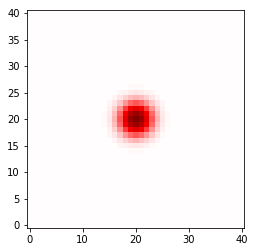

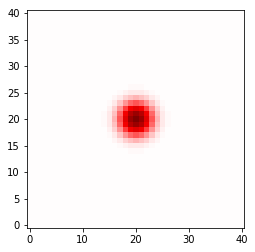

In [47]:
plt.figure()
plt.imshow(ab.image.array, vmin=-np.max(ab.image.array), vmax=np.max(ab.image.array), cmap=plt.cm.seismic)
plt.gca().invert_yaxis()
plt.savefig('test_1_shift_1000_real.pdf')

plt.figure()
image = ab.get_gaussian_image(0,0)
plt.imshow(image.array, vmin=-np.max(image.array), vmax=np.max(image.array), cmap=plt.cm.seismic)
plt.gca().invert_yaxis()
plt.savefig('test_0.pdf')


#ab.mas * 1e-3


In [74]:
class Gaussian(object):
    
    def __init__(self, sigma=1., flux=1.):

        self.sigma = sigma
        self.flux = flux

        self.g1 = 0.
        self.g2 = 0.

        self.dx = 0.
        self.dy = 0.
        
        self.X0 = 0.
        self.Y0 = 0.

    def _get_L(self):

        L = get_correlation_length_matrix(self.sigma, 
                                          self.g1, 
                                          self.g2)
        self.inv_L = np.linalg.inv(L)
        
    def shear(self, g1=0., g2=0.):

        self.g1 = g1
        self.g2 = g2
        
    def shift(self, dx=0., dy=0.):

        self.dx = dx
        self.dy = dy

        self.X0 = self.dx
        self.Y0 = self.dy
        
    def drawImage(self, method='auto', nx=21, ny=21, 
                  scale=1.):
        
        x = (np.linspace(0, nx-1, nx) - (nx-1.)/2.) * scale
        y = (np.linspace(0, ny-1, ny) - (ny-1.)/2.) * scale

        X, Y = np.meshgrid(x, y)

        X = X.reshape(nx*ny)
        Y = Y.reshape(nx*ny)
        
        self._get_L()

        D = np.zeros_like(X)
        for i in range(len(D)):
            xx = X[i] - self.X0
            yy = Y[i] - self.Y0
            vec = np.array([[xx],
                            [yy]])
            D[i] = vec.T.dot(np.dot(self.inv_L,vec))[0,0]
        
        Z = self.flux * np.exp(-0.5*D)
        self.array = Z.reshape((nx, ny))
        self.X = X.reshape((nx, ny))
        self.Y = Y.reshape((nx, ny))

class astro_bias_pf(object):
    
    def __init__(self, sigma=1., g1=0, g2=0, nx=41, ny=41, pixel_scale=0.2, 
                 mas=np.sqrt(20.), nreal=1000):
        
            self.sigma = sigma
            self.nx = nx
            self.ny = ny 
            self.pixel_scale = pixel_scale
            self.mas = mas
            self.nreal = nreal
            self.g1 = g1
            self.g2 = g2

    def get_gaussian_image(self, dx, dy):
        
        gauss = Gaussian(sigma=self.sigma, flux=1.)
        gauss.shear(g1=self.g1, g2=self.g2)
        gauss.shift(dx=dx, dy=dy)
        gauss.drawImage(method='no_pixel', nx=self.nx, ny=self.ny, 
                        scale=self.pixel_scale)
        return gauss.array
    
    def coadds_gal_atmo_shift(self):
        
        image_array = np.zeros((self.nx, self.ny))

        for i in range(self.nreal):
            dx = np.random.normal(scale=self.mas*1e-3)
            dy = np.random.normal(scale=self.mas*1e-3)
            im = self.get_gaussian_image(dx, dy)
            image_array += im
        self.image = image_array / self.nreal
            
    #def get_shear(self):
    #    
    #    true_image = self.get_gaussian_image(0,0)
    #    self.true_shear = galsim.hsm.FindAdaptiveMom(true_image)
    #    self.true_g1 = self.true_shear.observed_shape.g1
    #    self.true_g2 = self.true_shear.observed_shape.g2
    #    
    #    self.observed_shear = galsim.hsm.FindAdaptiveMom(self.image)
    #    self.observed_g1 = self.observed_shear.observed_shape.g1
    #    self.observed_g2 = self.observed_shear.observed_shape.g2

In [83]:
A = time.time()
ab = astro_bias_pf(sigma=1., g1=0.2, g2=0.2, nx=41, ny=41, pixel_scale=0.2, 
                mas=1000., nreal=1000)
ab.coadds_gal_atmo_shift()
B = time.time()

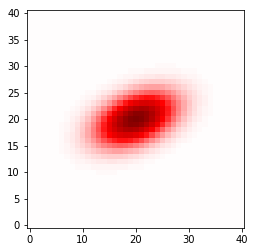

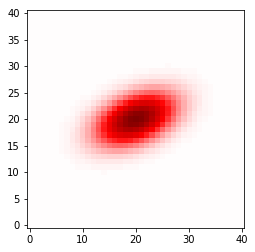

In [84]:
plt.figure()
plt.imshow(ab.image, vmin=-np.max(ab.image), vmax=np.max(ab.image), cmap=plt.cm.seismic)
plt.gca().invert_yaxis()
plt.savefig('test_1_shift_1000_real.pdf')

plt.figure()
image = ab.get_gaussian_image(0,0)
plt.imshow(image, vmin=-np.max(image), vmax=np.max(image), cmap=plt.cm.seismic)
plt.gca().invert_yaxis()
plt.savefig('test_0.pdf')
